# はじめに


このノートは、イベント「[プリキュアハッカソン Next Stage 2](https://cure-hack.connpass.com/event/136914/)」でのネタについて、
イマジネーションのままに書き散らかしたものです。


# 目次

 * お題
 * カラーパレット
   * デフォルトのもの
   * プリキュアカラーパレット
 * 感想
 * 資料
 


# お題


突然ですが、
皆様、グラフを描かれることはございますか？

ヒートマップやカテゴリ別の散布図など、色使いが大事なグラフがありますよね。
その色設定、皆様はどうされていますか？

例えば、グラフの配色が、お好きなプリキュアのカラーリングでしたら、いかがでしょう。
いつもより作業が捗るのではないでしょうか？

というわけで、
プリキュアっぽい配色で、Pythonで使えるカラーマップを作ってみました。


# カラーマップについて

Pythonで、グラフの表示を行うパッケージ `matplotib` や `seaborn` では、
配色を

 * 定義されたカラーマップ名
 * カラーマップクラス `matplotlib.colors.Colormap` のインスタンス
 
で指定できます。 
まずは、デフォルトで定義済みのカラーマップを見ていきましょう。


## デフォルトのカラーパレット


In [0]:
# 必要なパッケージ
import numpy as np
import pandas as pd
from sklearn import datasets

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

%matplotlib inline


# スタイル設定
# style="whitegrid"：白背景＋グリッド
# カラーパレットは指定しない(palette='deep'になる)
# color_codes=True：指定したパレットに簡略色コードを設定する('r'とか)
sns.set(style="whitegrid", color_codes=True) 


一覧にすると、こんな感じです。

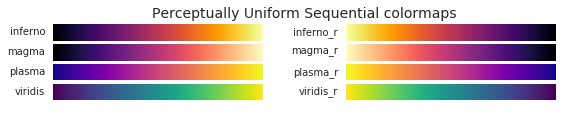

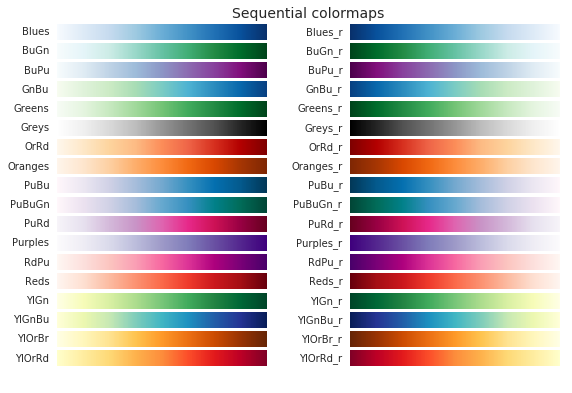

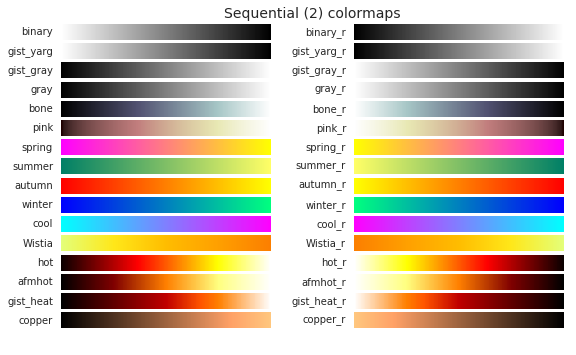

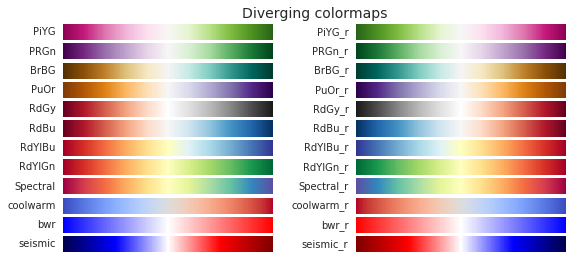

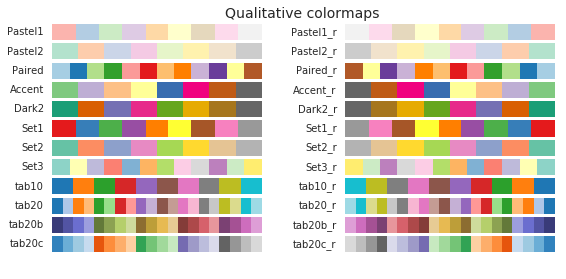

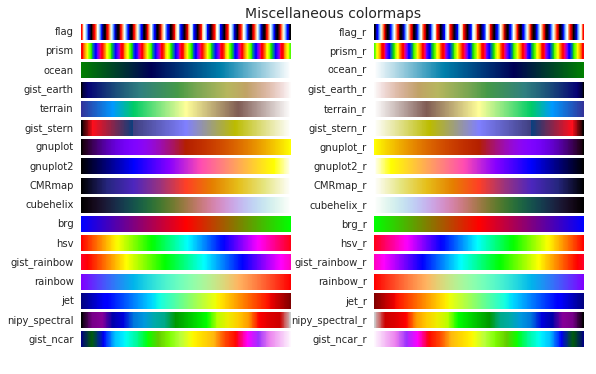

In [2]:
# 参考にした記事 ＜matplotlib - カラーマップについて＞ に掲載のカラーマップ表示ソース
# ここではコメントの追加しかしていない

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import OrderedDict



cmaps = OrderedDict()

# Sequential 系は、連続して変化するデータを見せるのに適している
cmaps['Perceptually Uniform Sequential'] = [
    'inferno', 'magma', 'plasma', 'viridis'
]
cmaps['Sequential'] = [
    'Blues', 'BuGn', 'BuPu', 'GnBu',
    'Greens', 'Greys', 'OrRd', 'Oranges',
    'PuBu', 'PuBuGn', 'PuRd', 'Purples',
    'RdPu', 'Reds', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd'
]
cmaps['Sequential (2)'] = [
    'binary', 'gist_yarg', 'gist_gray', 'gray',
    'bone', 'pink', 'spring', 'summer',
    'autumn', 'winter', 'cool', 'Wistia',
    'hot', 'afmhot', 'gist_heat', 'copper'
]

# Diverging 系は、基準となる値(0だったり、そうでなかったり)があり、基準値からどれだけ離れているかを見せるのに適している
cmaps['Diverging'] = [
    'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
    'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'
]

# Qualitative 系は、カテゴリごとの集計など、連続でない値を見せるのに適している
cmaps['Qualitative'] = [
    'Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
    'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c'
]

# その他。
# 'flag', 'prism' は短い周期性をもって変化するデータを見せるのに有効。
# ほかもそうかな。。。？
cmaps['Miscellaneous'] = [
    'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern', 'gnuplot',
    'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv', 'gist_rainbow', 'rainbow',
    'jet', 'nipy_spectral', 'gist_ncar'
]

# 表示するデータとして (1, 256) の配列を作成する。
gradient = np.linspace(0, 1, 256).reshape(1, -1)

def plot_color_maps(cmap_category, cmap_list):
    num_cmaps = len(cmap_list)
    fig, axes = plt.subplots(num_cmaps, 2, figsize=(9, num_cmaps * 0.35))
    fig.subplots_adjust(wspace=0.4)
    axes[0][0].set_title(cmap_category + ' colormaps', fontsize=14, x=1.2)
    
    def plot_color_map(ax, gradient, name):
        ax.imshow(gradient, aspect='auto', cmap=name)
        ax.set_axis_off()
        ax.text(-10, 0, name, va='center', ha='right', fontsize=10)
    
    for [axL, axR], name in zip(axes, cmap_list):
        plot_color_map(axL, gradient, name)
        plot_color_map(axR, gradient, name + '_r')

for cmap_category, cmap_list in cmaps.items():
    plot_color_maps(cmap_category, cmap_list)

plt.show()

実際に、このカラーマップでグラフを描いてみます。
分析勢にはおなじみの `iris` データを使います。


In [0]:
# iris(アヤメ)データのロード
iris = datasets.load_iris()

# DataFrameを構築 
# n×4 行列 X として、アヤメのデータを格納した2次元配列(iris.data)を指定。カラム名もアヤメのデータから(iris.feature_name)
X = pd.DataFrame(iris.data, columns = iris.feature_names)

# n次元ベクトル y として、アヤメの品種データを格納したベクトル(data.target)を指定。
y = pd.DataFrame(iris.target, columns = ['Species'])

# X と y を結合して n×5 行列にする。axis=1 で列の方向に連結させる
df = pd.concat([X, y], axis=1)


In [0]:
# DataFrameをちょっとだけみる(カラム名がわかればいいのでちょっとだけ)
df.info()

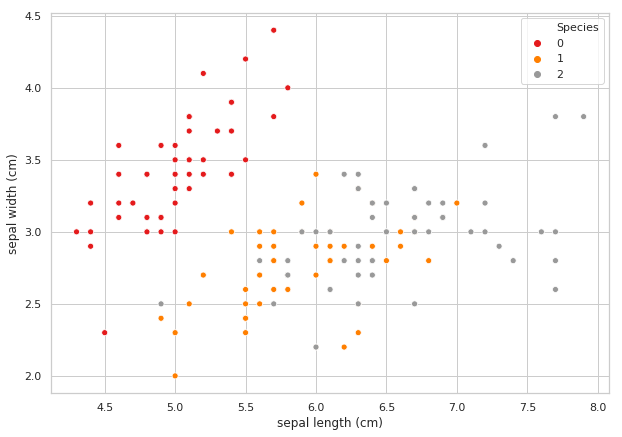

In [5]:
# 散布図の表示 

plt.figure(figsize=(10,7)) # サイズ設定 
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='Species', data=df, palette='Set1')


In [0]:
df.corr()

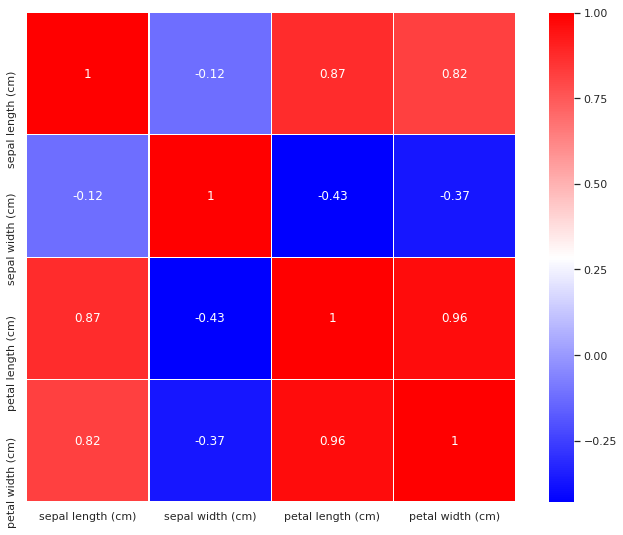

In [7]:
# 相関係数行列

plt.figure(figsize=(12,9)) # サイズ設定 
sns.heatmap(df[df.columns[df.columns != 'Species']].corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True, cmap='bwr')

以上が、デフォルトで使用できるカラーマップを使った場合です。

いいんですよ、見やすくて。

でも、__そうじゃない__。
この色使いには、キラキラルがないジャバ・・・

というわけで。


##  キュアップ・ラパパ！

色よ、プリキュアカラーに変われ！

・・・

プリキュアの魔法で、クラス `cure_colormap` が生み出されたようです。 

プリキュアの名前を呼ぶと、プリキュアっぽいカラーマップが返ってくるみたい！ワクワクもんだぁ！


In [0]:
# colormapをカスタマイズする
from matplotlib.colors import LinearSegmentedColormap


def generate_cmap(colors):
    '''
    指定した色でのカラーマップを返す
    
    Parameter
    ---------
    colors : array of color hexhcode
        色を16進数表記した文字列を格納した配列を指定してください。
        
    Return
    ------
    matplotlib.colors.Colormap object
    
    '''
    
    values = range(len(colors))
    
    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append( ( v/ vmax, c) )
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)


In [0]:
class cure_colormap :
    '''
    プリキュアっぽいカラーマップを生成して取得するクラス
    
    Attributes
    ----------
    name_to_cmap : dictionary object
        プリキュアの名称 -> colormap への対応
    
    cure_black
    cure_white
    shiny_luminous
    ：
    <ALL Precure> : matplotlib.colors.Colormap object
        各プリキュアのカラーマップ
        
        TODO：直接呼び出したかったからこうしたけど、全プリキュア分のインスタンス保持しとくのはさすがに重くね？呼び出されたときでよくね？
    
    '''
    def __init__(self):
        self.name_to_cmap = dict()

        # ふたりはプリキュア
        self.cure_black = self.generate_cmap(['#00072A', '#F4F6F6', '#E9497B'])
        self.name_to_cmap['キュアブラック'] = self.cure_black
        self.name_to_cmap['Cure Black'] = self.cure_black

        self.cure_white = self.generate_cmap(['#FBFBFB', '#C1F3FE', '#665FCC'])
        self.name_to_cmap['キュアホワイト'] = self.cure_white
        self.name_to_cmap['Cure White'] = self.cure_white

        # ふたりはプリキュア Max Heart
        self.shiny_luminous = self.generate_cmap(['#FECF04', '#FEFB53', '#F5F7F7', '#FEB1D1', '#FE3521'])
        self.name_to_cmap['シャイニールミナス'] = self.shiny_luminous
        self.name_to_cmap['Shiny Luminous'] = self.shiny_luminous

        # ふたりはプリキュア Splash Star
        self.cure_bloom = self.generate_cmap(['#FCAC35', '#FFFF8E', '#FF3292', '#942953'])
        self.name_to_cmap[''] = self.cure_bloom
        self.name_to_cmap['Cure Bloom'] = self.cure_bloom

        self.cure_bright = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF']) # 東映公式に大きめの画像がない？
        self.name_to_cmap[''] = self.cure_bright
        self.name_to_cmap['Cure Bright'] = self.cure_bright
        
        self.cure_eglet = self.generate_cmap(['#711391', '#FFFFF3', '#D0D6FF', '#06FCD5'])
        self.name_to_cmap[''] = self.cure_eglet
        self.name_to_cmap['Cure Egret'] = self.cure_eglet
        
        self.cure_windy = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])  # 東映公式に大きめの画像がない？
        self.name_to_cmap[''] = self.cure_windy
        self.name_to_cmap['Cure Windy'] = self.cure_windy

        self.kaoru_kiryuu = self.generate_cmap(['#052440', '#296295', '#E6EFEC', '#9095DC'])
        self.name_to_cmap['霧生薫'] = self.kaoru_kiryuu
        self.name_to_cmap['Kaoru Kiryuu'] = self.kaoru_kiryuu

        self.michiru_kiryuu = self.generate_cmap(['#8D2045', '#D36087', '#EAF6BD', '#C47888'])
        self.name_to_cmap['霧生満'] = self.michiru_kiryuu
        self.name_to_cmap['Michiru Kiryuu'] = self.michiru_kiryuu

        ##### TODO：未作成
        # Yes!プリキュア5
        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_
        [
            'Cure Dream',
            'Cure Rouge',
            'Cure Lemonade',
            'Cure Mint',
            'Cure Aqua'
        ]

        ##### TODO：未作成
        # Yes!プリキュア5GoGo!
        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_
        'Milky Rose'


        ##### TODO：未作成
        # フレッシュプリキュア!
        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_
        [
            'Cure Peach',
            'Cure Berry',
            'Cure Pine',
            'Cure Passion'
        ]
        
        ##### TODO：未作成
        # スイートプリキュア♪
        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_
        [
            'Cure Melody',
            'Cure Rhythm',
            'Cure Beat',
            'Cure Muse'
        ]

        
        ##### TODO：未作成
        # ハートキャッチプリキュア！
        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_
        [
            'Cure Blossom',
            'Cure Marine',
            'Cure Sunshine',
            'Cure Moonlight'
        ]

        ##### TODO：未作成
        # スマイルプリキュア!
        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_
        [
            'Cure Happy',
            'Cure Sunny',
            'Cure Peace',
            'Cure March',
            'Cure Beauty',

        ]


        # ドキドキ!プリキュア
        self.cure_heart = self.generate_cmap(['#D4A615', '#FFF99E', '#FAFAFA', '#FAB1E2', '#EC3C9C'])
        self.name_to_cmap[''] = self.cure_heart
        self.name_to_cmap['Cure Heart'] = self.cure_heart

        self.cure_diamond = self.generate_cmap(['#4245AF', '#A8ACF9', '#FAFAFA', '#5791F1', '#597AA7'])
        self.name_to_cmap[''] = self.cure_diamond
        self.name_to_cmap['Cure Diamond'] = self.cure_diamond

        self.cure_rosetta = self.generate_cmap(['#B3481E', '#FFC05C', '#FAFAFA', '#C9EFB6', '#F7DB3D'])
        self.name_to_cmap[''] = self.cure_rosetta
        self.name_to_cmap['Cure Rosetta'] = self.cure_rosetta

        self.cure_sword = self.generate_cmap(['#AE57B5', '#EEB4F8', '#FAFAFA', '#ADBBF5', '#8B87B2'])
        self.name_to_cmap[''] = self.cure_sword
        self.name_to_cmap['Cure Sword'] = self.cure_sword

        self.cure_ace = self.generate_cmap(['#A51318', '#FD757D', '#FFE8EC', '#FAFAFA', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_ace
        self.name_to_cmap['Cure Ace'] = self.cure_ace

        self.cure_sebastian = self.generate_cmap(['#36424E', '#E0EBF1', '#DB0517', '#DB3FA2', '#F48484'])
        self.name_to_cmap[''] = self.cure_sebastian
        self.name_to_cmap['Cure Sebastian'] = self.cure_sebastian

        ##### TODO：未作成
        # ハピネスチャージプリキュア!
        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_
        [
            'Cure Lovely',
            'Cure Princess',
            'Cure Honey',
            'Cure Fortune',
            'Cure Mirage'

        ]
        
        # Go!プリンセスプリキュア
        self.cure_flora = self.generate_cmap(['#DC3482', '#FE8ADA', '#FFF5FD', '#F8F5A2'])
        self.name_to_cmap['キュアフローラ'] = self.cure_flora
        self.name_to_cmap['Cure Flora'] = self.cure_flora
        
        self.cure_marmaid = self.generate_cmap(['#3C57D8', '#8EE9D8', '#F1FBF2', '#FCC3DD'])
        self.name_to_cmap['キュアマーメイド'] = self.cure_marmaid
        self.name_to_cmap['Cure Mermaid'] = self.cure_marmaid
        
        self.cure_twinkle = self.generate_cmap(['#F15312', '#FF9A18', '#FDFF94', '#FCE92D', '#BA70F8'])
        self.name_to_cmap['キュアトゥインクル'] = self.cure_twinkle
        self.name_to_cmap['Cure Twinkle'] = self.cure_twinkle
        
        self.cure_scarlet = self.generate_cmap(['#E73F94', '#FEC8FC', '#F6D437', '#E01646'])
        self.name_to_cmap['キュアスカーレット'] = self.cure_scarlet
        self.name_to_cmap['Cure Scarlet'] = self.cure_scarlet
        

        ##### TODO：未作成
        # 魔法つかいプリキュア!
        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_
        [
            'Cure Miracle',
            'Cure Magical',
            'Cure Felice',
            'Cure Mofurun'
        ]

        ##### TODO：未作成
        # キラキラ☆プリキュアアラモード
        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_
        [
            'Cure Whip',
            'Cure Custard',
            'Cure Gelato',
            'Cure Macaron',
            'Cure Chocolat',
            'Cure Parfait',
            'Cure Pekorin'
        ]

        ##### TODO：未作成
        # HUGっと！プリキュア
        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_
        [
            'Cure Yell',
            'Cure Ange',
            'Cure Etoile',
            'Cure Macherie',
            'Cure Amour',
            'Cure Tomorrow'

        ]

        ##### TODO：未作成
        # スター☆トゥインクルプリキュア
        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_

        self.cure_ = self.generate_cmap(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'])
        self.name_to_cmap[''] = self.cure_
        self.name_to_cmap[''] = self.cure_
        [
            'Cure Star',
            'Cure Milky',
            'Cure Soleil',
            'Cure Selene',
            'Cure Cosmo',

        ]

    def get_by_name(self, name):
        '''
        プリキュアの名前を受取り、対応するカラーマップを返す
        
        Parameter
        ---------
        name : string [in]
            プリキュアの名称
        
        Return
        ------
        matplotlib.colors.Colormap object
        一致するプリキュアがいなければNone
        
        '''
        return self.name_to_cmap.get(name)
    

    def generate_cmap(self, colors):
        '''
        指定した色でのカラーマップを返す

        Parameter
        ---------
        colors : array of color hexhcode
            色を16進数表記した文字列を格納した配列を指定してください。

        Return
        ------
        matplotlib.colors.Colormap object

        '''

        values = range(len(colors))

        vmax = np.ceil(np.max(values))
        color_list = []
        for v, c in zip(values, colors):
            color_list.append( ( v/ vmax, c) )
        return LinearSegmentedColormap.from_list('custom_cmap', color_list)


In [0]:
## テスト
def test_cure_colormap():
    cure_colors = cure_colormap()
    print("cure_colors.cure_twinkle: ", cure_colors.cure_twinkle) # メンバ直打ち
    print("cure_colors.get_by_name('キュアトゥインクル'): ", cure_colors.get_by_name('キュアトゥインクル')) # 名前で呼ぶ
    print("cure_colors.get_by_name('キュアゴリラ'): ", cure_colors.get_by_name('キュアゴリラ'))   # Noneに軟着陸する

test_cure_colormap()

では、どんな色か見てみましょう！

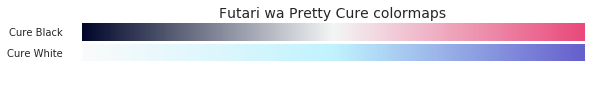

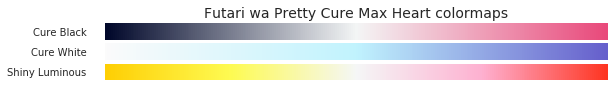

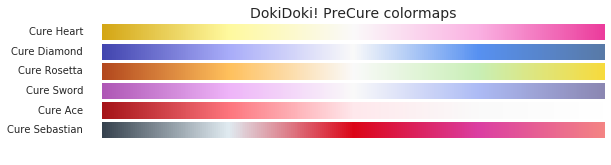

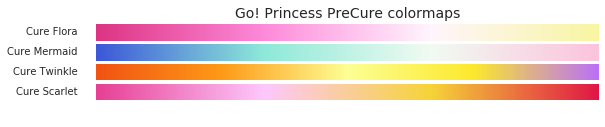

In [11]:
# カラーマップ表示 プリキュア版
# 未作成のプリキュアはコメント化
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import OrderedDict


cure_colors = cure_colormap()
cmaps = OrderedDict()

# ふたりはプリキュア
cmaps['Futari wa Pretty Cure'] = [
    'Cure Black',
    'Cure White'
]

# ふたりはプリキュア Max Heart
cmaps['Futari wa Pretty Cure Max Heart'] = [
    'Cure Black',
    'Cure White',
    'Shiny Luminous'
]


'''
# ふたりはプリキュア Splash Star
cmaps['Futari wa Pretty Cure Splash Star'] = [
    'Cure Bloom',
    'Cure Bright',
    'Cure Egret',
    'Cure Windy',
    'Kaoru Kiryuu', #霧生薫
    'Michiru Kiryuu', #霧生満
]

# Yes!プリキュア5
cmaps['Yes! PreCure 5'] = [
    'Cure Dream',
    'Cure Rouge',
    'Cure Lemonade',
    'Cure Mint',
    'Cure Aqua'
]

# Yes!プリキュア5GoGo!
cmaps['Yes! PreCure 5 GoGo!'] = [
    'Cure Dream',
    'Cure Rouge',
    'Cure Lemonade',
    'Cure Mint',
    'Cure Aqua',
    'Milky Rose'
]

# フレッシュプリキュア!
cmaps['Fresh Pretty Cure!'] = [
    'Cure Peach',
    'Cure Berry',
    'Cure Pine',
    'Cure Passion'
]

# ハートキャッチプリキュア！
cmaps['HeartCatch PreCure!'] = [
    'Cure Blossom',
    'Cure Marine',
    'Cure Sunshine',
    'Cure Moonlight'
]

# スイートプリキュア♪
cmaps['Suite PreCure'] = [
    'Cure Melody',
    'Cure Rhythm',
    'Cure Beat',
    'Cure Muse'
]

# スマイルプリキュア!
cmaps['Smile PreCure!'] = [
    'Cure Happy',
    'Cure Sunny',
    'Cure Peace',
    'Cure March',
    'Cure Beauty',

]
'''

# ドキドキ!プリキュア
cmaps['DokiDoki! PreCure'] = [
    'Cure Heart',
    'Cure Diamond',
    'Cure Rosetta',
    'Cure Sword',
    'Cure Ace',
    'Cure Sebastian',

]

'''
# ハピネスチャージプリキュア!
cmaps['HappinessCharge PreCure!'] = [
    'Cure Lovely',
    'Cure Princess',
    'Cure Honey',
    'Cure Fortune',
    'Cure Mirage'

]
'''

# Go!プリンセスプリキュア
cmaps['Go! Princess PreCure'] = [
    'Cure Flora',
    'Cure Mermaid',
    'Cure Twinkle',
    'Cure Scarlet'
]

'''
# 魔法つかいプリキュア!
cmaps['Witchy PreCure!'] = [
    'Cure Miracle',
    'Cure Magical',
    'Cure Felice',
    'Cure Mofurun'
]

# キラキラ☆プリキュアアラモード
cmaps['Kirakira PreCure a la Mode'] = [
    'Cure Whip',
    'Cure Custard',
    'Cure Gelato',
    'Cure Macaron',
    'Cure Chocolat',
    'Cure Parfait',
    'Cure Pekorin'
]

# HUGっと！プリキュア
cmaps['Hugtto! PreCure'] = [
    'Cure Yell',
    'Cure Ange',
    'Cure Etoile',
    'Cure Macherie',
    'Cure Amour',
    'Cure Tomorrow'

]

# スター☆トゥインクルプリキュア
cmaps['Star Twinkle PreCure'] = [
    'Cure Star',
    'Cure Milky',
    'Cure Soleil',
    'Cure Selene',
    'Cure Cosmo',

]
'''
    
# 表示するデータとして (1, 256) の配列を作成する。
gradient = np.linspace(0, 1, 256).reshape(1, -1)

def plot_color_maps(cmap_category, cmap_list):
    '''
    
    '''
    num_cmaps = len(cmap_list)
    fig, axes = plt.subplots(num_cmaps, 1, figsize=(9, num_cmaps * 0.35))
    fig.subplots_adjust(wspace=0.4)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14, x=0.5)
    
    def plot_color_map(ax, gradient, name):
        cmap = cure_colors.get_by_name(name) 
        if cmap is None:
            return
        
        ax.imshow(gradient, aspect='auto', cmap=cmap)
        ax.set_axis_off()
        ax.text(-10, 0, name, va='center', ha='right', fontsize=10)
    
    for ax, name in zip(axes, cmap_list):
        plot_color_map(ax, gradient, name)
        # plot_color_map(axR, gradient, name + '_r') # 逆向きは作っていないので、上の表示も順方向だけのものに変更

for cmap_category, cmap_list in cmaps.items():
    plot_color_maps(cmap_category, cmap_list)

plt.show()

実際に、グラフに適用してみましょう。

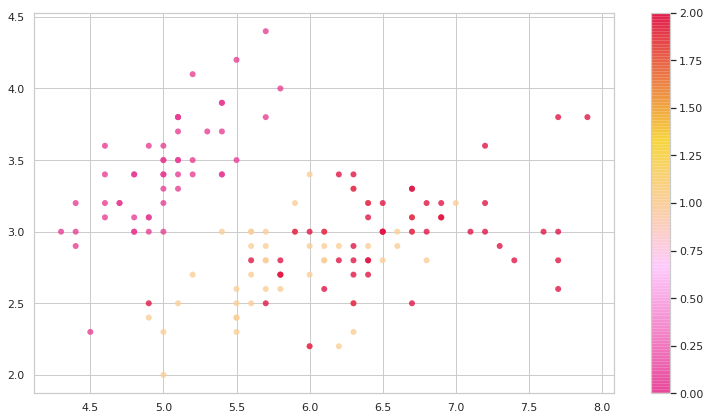

In [14]:
# 再びiris
cure_colors = cure_colormap()

fig = plt.figure(figsize=(13,7))
im = plt.scatter(iris.data[:,0], iris.data[:,1], c=iris.target, linewidths=0, alpha=.8, cmap=cure_colors.cure_scarlet)
fig.colorbar(im)
plt.show()

(LT後追記)

違うクラスタの色の差があまりない場合が多くて、
LTしながら「あまりいい使用例じゃないな。。。」と思った。というか言ってた。
ごめんなさい、トワ様。

よくよく考えたら、キャラクターに使用する色合いってのは
調和が取れる色になっているわけで、
似た色で色分けしちちゃうことになる(結果見づらい)のは当たり前。

キュアコスモやキュアパルフェのように「七色」がキーカラーのプリキュアで色付するのがいいだろうと思いました。

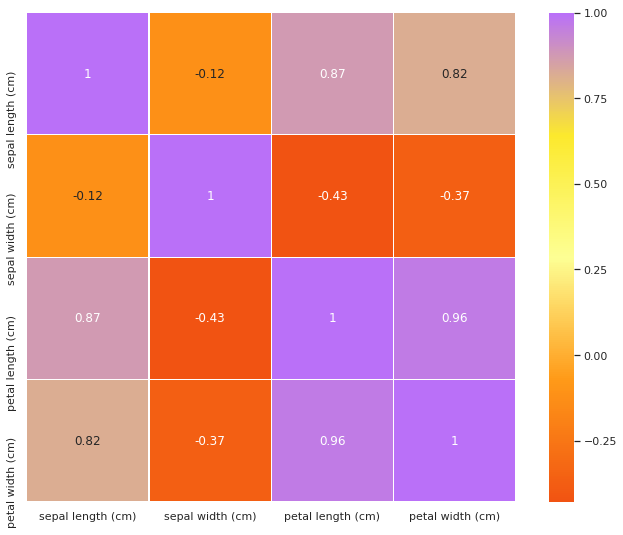

In [13]:
# 相関係数行列

plt.figure(figsize=(12,9)) # サイズ設定 
sns.heatmap(df[df.columns[df.columns != 'Species']].corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True, cmap=cure_colors.cure_twinkle)

仕事中ワイ「では、次のグラフをご覧ください」

脳内ワイ「きらめく星のプリンセス！キュアトゥインクル！」

といった具合に、テンションキラヤバ(☆のプリキュアつながり)な感じでプレゼンに臨むことができ、
お仕事が捗ることうけあいかと思います！


　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　おしまい。



# おわりに

 * やっぱり終わらなかった(白目)
   * 色を調べるのに意外と時間がかかった。さらに色の割合とか、中間色でグラデーションを整えるとか、調整を始めると時間が吹っ飛ぶ
 * ~~需要があったら公開します。そんなにボリュームないので、パッケージ化とかしません。~~
 * LTしたので公開します！すっごい中途半端な状態ですが。。。プリキュアに誓って絶対に完成させます。
   

# 参考資料


 * __＜【Python】matplotlibによるグラフ描画時のColormapのカスタマイズ＞__  
    [https://qiita.com/kenmatsu4/items/fe8a2f1c34c8d5676df8](https://qiita.com/kenmatsu4/items/fe8a2f1c34c8d5676df8)
 * __＜matplotlib - カラーマップについて＞__  
    [http://pynote.hatenablog.com/entry/matplotlib-color](http://pynote.hatenablog.com/entry/matplotlib-color)
    

# その他


## プリキュアの名称について

 * 英語名とメンバ変数名は[英語版Wikipedia](https://en.wikipedia.org/wiki/Pretty_Cure)準拠

### 色の採り方について

 * 「[プリキュアガーデン](http://www.toei-anim.co.jp/ptr/precure/)」以下の各作品ページにある
   キャラクター紹介ページの画像から抽出
   * 「髪の毛の色」、「衣装の色」で構成してます
   * ただしSSは絵が足りなかったので[朝日放送のページ](https://www.asahi.co.jp/precure_ss/)から
 * Chrome拡張「ColorPick Eyedropper」を使用して取得
   * 配布は[こちら](https://chrome.google.com/webstore/detail/colorpick-eyedropper/ohcpnigalekghcmgcdcenkpelffpdolg)

### 追加の資料情報

 * [＜キュアっぽさは色味から。カラースキームを抽出してプリキュアっぽいカラーパレットを作ってみよう＞ ](https://www.gizmodo.jp/2017/05/precure-color-palette.html)
   * 見落としていた先行研究。ありがたい！
